# Importing and Exploring data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Start to define the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 6))

# Size of matplotlib figures that contain subplots
figsize_with_subplots = (18, 30)

In [3]:
df = pd.read_csv(r"in-vehicle-coupon-recommendation.csv")
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

# Dropping unwanted features


In [6]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [7]:
round(((df.isnull().sum()/len(df))*100),2)

destination              0.00
passanger                0.00
weather                  0.00
temperature              0.00
time                     0.00
coupon                   0.00
expiration               0.00
gender                   0.00
age                      0.00
maritalStatus            0.00
has_children             0.00
education                0.00
occupation               0.00
income                   0.00
car                     99.15
Bar                      0.84
CoffeeHouse              1.71
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.49
toCoupon_GEQ5min         0.00
toCoupon_GEQ15min        0.00
toCoupon_GEQ25min        0.00
direction_same           0.00
direction_opp            0.00
Y                        0.00
dtype: float64

In [8]:
#dropping car as most values are null
df = df.drop('car', axis=1)

C:\Users\kishore\AppData\Local\Temp/ipykernel_14916/27828982.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


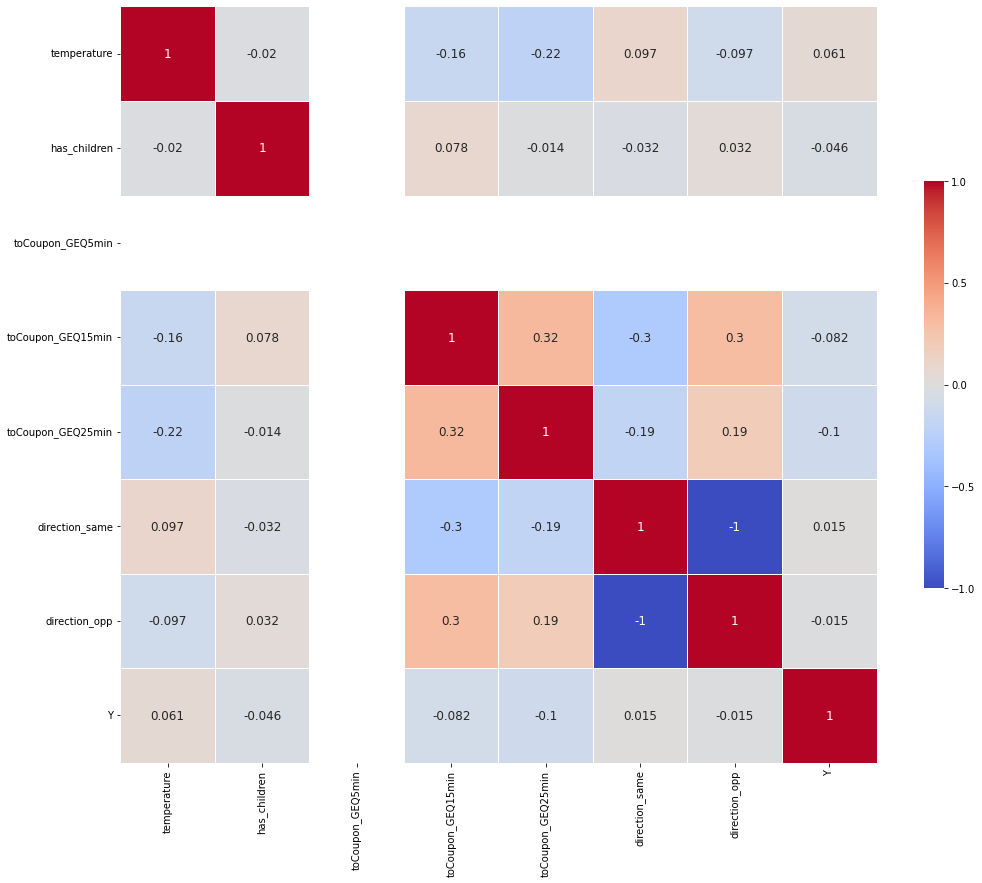

In [9]:
import seaborn as sns

mask = np.zeros_like(df.corr(), dtype=np.bool)
f, ax = plt.subplots(figsize=(15,15)) 
heatmap = sns.heatmap(df.corr(), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(df.corr().columns, rotation = 0)
ax.set_xticklabels(df.corr().columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.tight_layout()

In [10]:
#dropping opposite direction, as this seems to feature a high level of correlation w/ direction same
df = df.drop('direction_opp', axis=1)

## Exploring ordinal categorical variables

In [11]:
df.select_dtypes('int64').nunique()

temperature          3
has_children         2
toCoupon_GEQ5min     1
toCoupon_GEQ15min    2
toCoupon_GEQ25min    2
direction_same       2
Y                    2
dtype: int64

### We'll drop GEQ5min as it has only one value throughout the dataset

In [12]:
df.drop('toCoupon_GEQ5min', axis = 1, inplace=True)

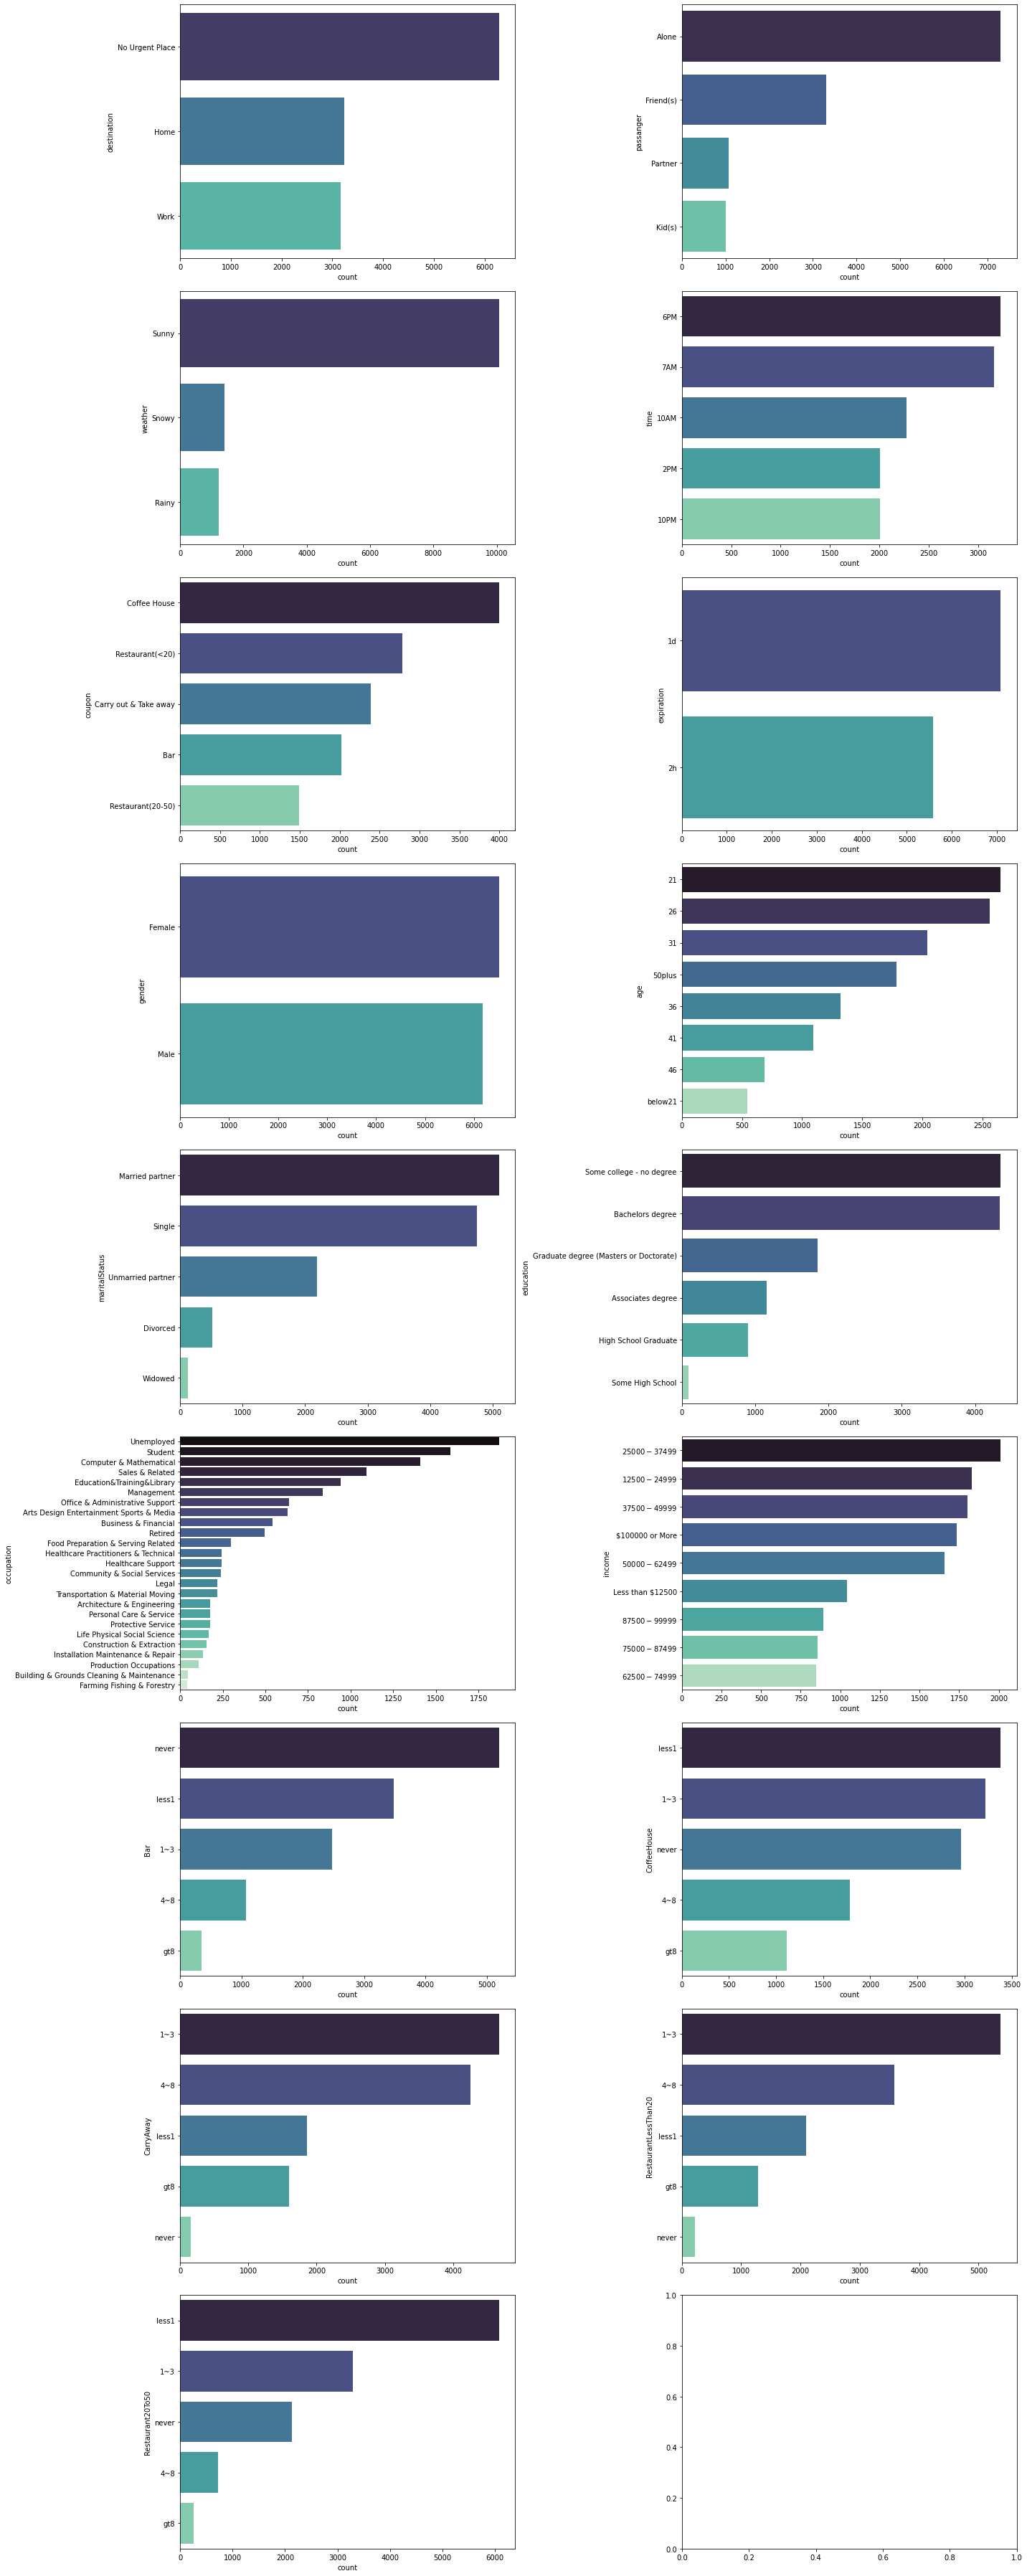

In [13]:
fig, axs = plt.subplots(9,2, figsize = (20,50))
axs = axs.flatten()

for ax, col in zip(axs, df.select_dtypes('object').columns):
    sns.countplot(y = col, data = df, ax = ax, palette = "mako", order = df[col].value_counts().index)

plt.tight_layout()
plt.show()

### Feature engineering: Group the occupation into broader categories to reduce sparsity

In [44]:
print(df['occupation'].unique())
sales_and_support = ['Sales & Related','Office & Administrative Support','Healthcare Support','Installation Maintenance & Repair','Building & Grounds Cleaning & Maintenance']
professional = ['Healthcare Practitioners & Technical','Legal','Architecture & Engineering','Construction & Extraction','Transportation & Material Moving','Business & Financial','Management','Computer & Mathematical','Education&Training&Library']
service = ['Food Preparation & Serving Related','Community & Social Services','Personal Care & Service','Protective Service']
other = ['Farming Fishing & Forestry','Production Occupations','Arts Design Entertainment Sports & Media','Life Physical Social Science']

df['new_occupation'] = df['occupation']
df['new_occupation'] = df['new_occupation'].replace(sales_and_support, 'Sales & Support')
df['new_occupation'] = df['new_occupation'].replace(professional, 'Professional')
df['new_occupation'] = df['new_occupation'].replace(service, 'Service')
df['new_occupation'] = df['new_occupation'].replace(other, 'Other')

print(df['new_occupation'].unique())

['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']
['Unemployed' 'Professional' 'Student' 'Sales & Support' 'Other' 'Service'
 'Retired']


### Save the cleaned dataframe as csv for backup

In [ ]:
df.to_csv('in_coupon_data_cleaned.csv', index=False)

### Import neccessary libraries 

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

In [22]:
#Download the clean data set from here : https://www.dropbox.com/s/pjd96j1xdqlaoci/in_coupon_data_cleaned.csv?dl=0
data =  pd.read_csv('in_coupon_data_cleaned.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
destination             12684 non-null object
passanger               12684 non-null object
weather                 12684 non-null object
temperature             12684 non-null int64
time                    12684 non-null object
coupon                  12684 non-null object
expiration              12684 non-null object
gender                  12684 non-null object
age                     12684 non-null object
maritalStatus           12684 non-null object
has_children            12684 non-null int64
education               12684 non-null object
occupation              12684 non-null object
income                  12684 non-null object
Bar                     12577 non-null object
CoffeeHouse             12467 non-null object
CarryAway               12533 non-null object
RestaurantLessThan20    12554 non-null object
Restaurant20To50        12495 non-null object
toCoupon_GEQ15min  

In [21]:
#IF the we want to drop the rows with null values skip this step otherwise.
data = data.dropna()

Checking for Class balance, The class is quite balanced.

In [31]:
data.groupby('Y')['Y'].count()

Y
0    5474
1    7210
Name: Y, dtype: int64

<b>Vectorization</b> is task performed to make the data model Ready, this is essentially the phase where data is fully converted into a numeric form.
<br/><b>Scaling</b>: Since all the features are categorical and one hot encoded, all the scales are consistent and therefore doesn’t need to perform scaling

### Convert categorical features in numeric format to Label encoding

Temperature has only 3 values and hence is considered as categorical values, therefore they are label encoded below

In [6]:
data['temperature'] =  data['temperature'].map({30:1,55:2,80:3})

## Convert all the categorical features into One-hot Encoding

In [7]:
list(data.columns)

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'Y',
 'new_occupation']

In [8]:
categorical_features = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age',
 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same','new_occupation']

In [9]:
categorical_features_onehot =  ['destination', 'weather', 'passanger', 'time', 'coupon', 'expiration', 'gender', 'age',
 'maritalStatus', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
 'Restaurant20To50','new_occupation']

In [10]:
remaining_features = list(set(categorical_features)-set(categorical_features_onehot))

In [11]:
remaining_features

['toCoupon_GEQ15min',
 'direction_same',
 'has_children',
 'temperature',
 'toCoupon_GEQ25min']

In [12]:
one_hot_cat = pd.concat([pd.get_dummies(data[col]) for col in categorical_features_onehot], axis=1)
onehot_encoded = data[remaining_features].join(one_hot_cat)

<b>Choice of Evaluation Metric.</b>
* AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1
* The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.
* TPR – True positive rate - used to measure the percentage of actual positives which are correctly identified.
* FPR – False positive rate - used to measure the false positive rate is based on how many actual negatives the model predicted incorrectly.
* AUC is a better metric because AUC takes into account the probabilities of classes being positive or negative. Therefore, better estimates the capacity of model to distinguish between positive and negative classes.


<b>Cross Validation.</b>
For evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. We are using CV of 3 and using ROC-AUC as CV evaluation metric for all the models. This is achieved using GridSearchCV from sklearn.


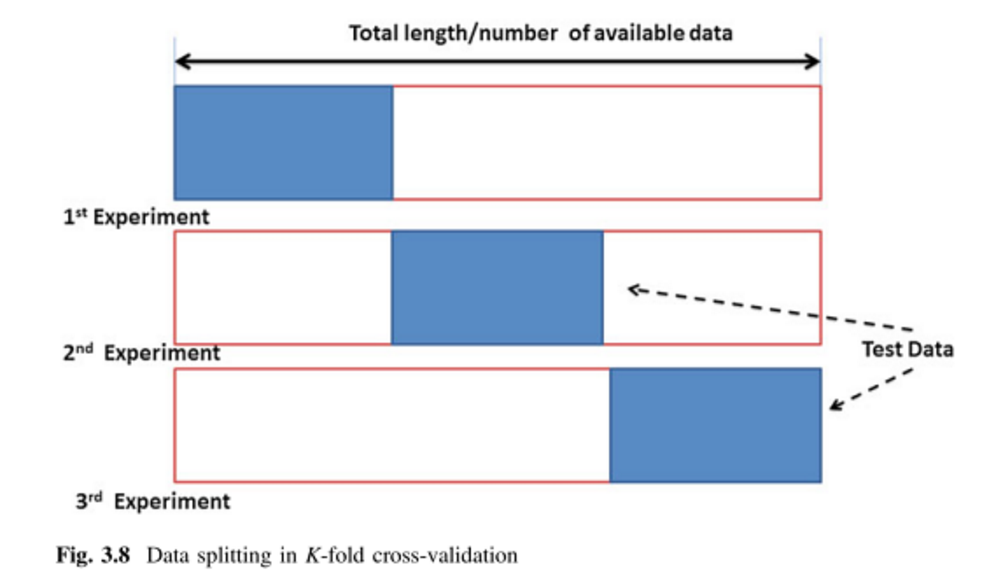

In [13]:
X = onehot_encoded
y = data['Y']

In [14]:
X.shape,y.shape

((12079, 114), (12079,))

##### Splitting the Data into train and Test, with 75% train and 25% Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9059, 114), (3020, 114), (9059,), (3020,))

### Bayesian Models

Multinomial Naive Bayes

Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features 

In [78]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [79]:
mnb = MultinomialNB()
parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(mnb, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [80]:
clf.best_estimator_,clf.best_score_

(MultinomialNB(alpha=10), 0.7145726487118585)

In [81]:
results = pd.DataFrame.from_dict(clf.cv_results_)

In [82]:
alpha = results['param_alpha']
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score'] 
alpha_log = [np.log(x) for x in alpha]

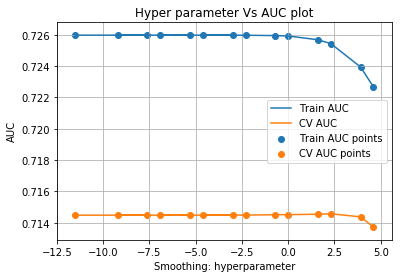

In [83]:
plt.plot(alpha_log, train_auc, label='Train AUC')

plt.plot(alpha_log, cv_auc, label='CV AUC')

plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Smoothing: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()


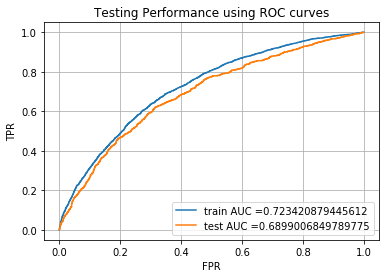

In [115]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
mnb = MultinomialNB(alpha=10)
mnb.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = np.array([mnb.predict_proba(X_train)[i][1] for i in range(len(X_train))])
y_test_pred = np.array([mnb.predict_proba(X_test)[i][1] for i in range(len(X_test))])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Testing Performance using ROC curves")
plt.grid()
plt.show()

In [119]:
print(tabulate([ 
                ['OneHot','Naive Bayes',10,0.69,0.71]],
               headers=['Vectorizer', 'Model', 'HyperParameter : alpha', "Test AUC","Train AUC"],
               tablefmt='orgtbl'))


| Vectorizer   | Model       |   HyperParameter : alpha |   Test AUC |   Train AUC |
|--------------+-------------+--------------------------+------------+-------------|
| OneHot       | Naive Bayes |                       10 |       0.69 |        0.71 |


## Linear Models

Logistic Regression using SGD

For logistic Regression we use Stochastic Gradient Descent with Log loss <br/>
Logistic regression is a statistical method used to predict the outcome of a dependent variable based on previous observations. Here for alpha is inverse of regularization strength which helps model to generalize. Higher the alpha less the weight is given to the training data, therefore trying to establish an optimal bias Variance trade-off

In [141]:
log_r = SGDClassifier(loss='log')
parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(log_r, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [142]:
clf.best_estimator_,clf.best_score_

(SGDClassifier(alpha=0.001, loss='log'), 0.7446053326984908)

In [143]:
results = pd.DataFrame.from_dict(clf.cv_results_)
alpha = results['param_alpha']
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score'] 
alpha_log = [np.log(x) for x in alpha]

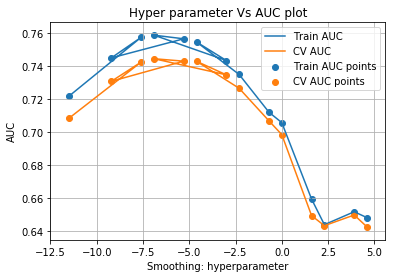

In [144]:
plt.plot(alpha_log, train_auc, label='Train AUC')
plt.plot(alpha_log, cv_auc, label='CV AUC')
plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Smoothing: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

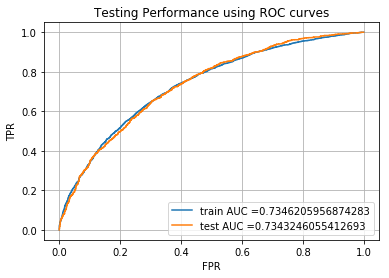

In [41]:
clf = SGDClassifier(eta0=0.0001, alpha=0.005, loss='log', random_state=15, 
                                 penalty='l2', tol=1e-3, verbose=0, learning_rate='constant')
clf.fit(X_train,y_train)
y_train_pred = np.array([clf.predict_proba(X_train)[i][1] for i in range(len(X_train))])
y_test_pred = np.array([clf.predict_proba(X_test)[i][1] for i in range(len(X_test))])

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Testing Performance using ROC curves")
plt.grid()
plt.show()

Support Vector Machine, implemented using Stochastic Gradeint Descent with Hinge loss <br/>
Works on the principle of margin maximization between the two classes. Alpha is the inverse of weight given to the error term which tuned over a range of values to find the best fit model.

In [147]:
svc_r = SGDClassifier(eta0=0.0001, alpha=0.005, loss='hinge', random_state=15, 
                                 penalty='l2', tol=1e-3, verbose=0, learning_rate='constant')
parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(svc_r, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=SGDClassifier(alpha=0.005, eta0=0.0001,
                                     learning_rate='constant',
                                     random_state=15),
             param_grid={'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                   0.01, 0.1, 0.5, 1, 5, 10, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [148]:
clf.best_estimator_,clf.best_score_

(SGDClassifier(alpha=0.0005, eta0=0.0001, learning_rate='constant',
               random_state=15), 0.738894583924063)

In [149]:
results = pd.DataFrame.from_dict(clf.cv_results_)
alpha = results['param_alpha']
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score']
cv_auc_std= results['std_test_score'] 
alpha_log = [np.log(x) for x in alpha]

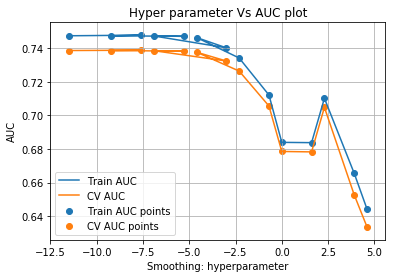

In [150]:
plt.plot(alpha_log, train_auc, label='Train AUC')
plt.plot(alpha_log, cv_auc, label='CV AUC')
plt.scatter(alpha_log, train_auc, label='Train AUC points')
plt.scatter(alpha_log, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Smoothing: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

In [159]:
print(tabulate([ 
                ['OneHot','Naive Bayes',10,0.69,0.71], ['OneHot','Logistic Regression',0.05,0.71,0.74],
 ['OneHot','SVM Linear',0.005,0.71,0.73]],
               headers=['Vectorizer', 'Model', 'HyperParameter : alpha', "Test AUC","Train AUC"],
               tablefmt='orgtbl'))


| Vectorizer   | Model               |   HyperParameter : alpha |   Test AUC |   Train AUC |
|--------------+---------------------+--------------------------+------------+-------------|
| OneHot       | Naive Bayes         |                   10     |       0.69 |        0.71 |
| OneHot       | Logistic Regression |                    0.05  |       0.71 |        0.74 |
| OneHot       | SVM Linear          |                    0.005 |       0.71 |        0.73 |


### Tree Based and Ensemble Models

Decision Tress with Hyper Parameter tuning on Min_samples and the max_Depth <br/>
It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).
The depth of the tree and min_samples to split are the hyper parameters


In [19]:
deci = DecisionTreeClassifier()
parameters = {'max_depth': [1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
clf = GridSearchCV(deci, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [20]:
clf.best_estimator_,clf.best_score_

(DecisionTreeClassifier(max_depth=50, min_samples_split=100),
 0.739692350036348)

In [24]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

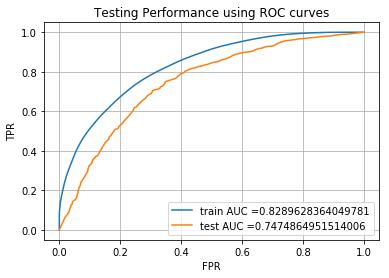

In [26]:
deci = DecisionTreeClassifier(max_depth=50,min_samples_split=100)
deci.fit(X_train, y_train)

y_train_pred = batch_predict(deci, X_train)    
y_test_pred = batch_predict(deci, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Testing Performance using ROC curves")
plt.grid()
plt.show()

In [177]:
print(tabulate([ 
                ['OneHot','Naive Bayes',10,0.69,0.71], ['OneHot','Logistic Regression',0.05,0.71,0.74],
 ['OneHot','SVM Linear',0.005,0.71,0.73],['OneHot','Decison Trees','d=50,min-sample:100',0.75,0.84]],
               headers=['Vectorizer', 'Model', 'HyperParameter', "Test AUC","Train AUC"],
               tablefmt='orgtbl'))


| Vectorizer   | Model               | HyperParameter      |   Test AUC |   Train AUC |
|--------------+---------------------+---------------------+------------+-------------|
| OneHot       | Naive Bayes         | 10                  |       0.69 |        0.71 |
| OneHot       | Logistic Regression | 0.05                |       0.71 |        0.74 |
| OneHot       | SVM Linear          | 0.005               |       0.71 |        0.73 |
| OneHot       | Decison Trees       | d=50,min-sample:100 |       0.75 |        0.84 |


#### Random Forest Ensemble Model

It builds decision trees on different samples and takes their majority vote for classification and average in case of regression. n_estimators – no of decision trees, max_depth, max features are the hyper parameters.

In [181]:
rf_c = RandomForestClassifier()
parameters =  {'n_estimators': [200,500],'max_features': [.5,.7],'max_depth':[3,6]}
clf = GridSearchCV(rf_c, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6], 'max_features': [0.5, 0.7],
                         'n_estimators': [200, 500]},
             return_train_score=True, scoring='roc_auc')

In [182]:
clf.best_estimator_,clf.best_score_

(RandomForestClassifier(max_depth=6, max_features=0.5, n_estimators=500),
 0.7757300897202796)

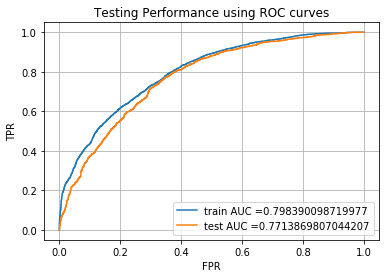

In [56]:
rf_c = RandomForestClassifier(max_depth=6, max_features=0.5, n_estimators=500)
rf_c.fit(X_train, y_train)

y_train_pred = batch_predict(rf_c, X_train)    
y_test_pred = batch_predict(rf_c, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Testing Performance using ROC curves")
plt.grid()
plt.show()

In [184]:
print(tabulate([ 
                ['OneHot','Naive Bayes',10,0.69,0.71], ['OneHot','Logistic Regression',0.05,0.71,0.74],
 ['OneHot','SVM Linear',0.005,0.71,0.73],['OneHot','Decison Trees','d=50,min-sample:100',0.75,0.84],
    ['OneHot','Random Forest Model','max_depth=6, max_features=0.5, n_estimators=500',0.76,0.81]],
               headers=['Vectorizer', 'Model', 'HyperParameter', "Test AUC","Train AUC"],
               tablefmt='orgtbl'))

| Vectorizer   | Model               | HyperParameter                                  |   Test AUC |   Train AUC |
|--------------+---------------------+-------------------------------------------------+------------+-------------|
| OneHot       | Naive Bayes         | 10                                              |       0.69 |        0.71 |
| OneHot       | Logistic Regression | 0.05                                            |       0.71 |        0.74 |
| OneHot       | SVM Linear          | 0.005                                           |       0.71 |        0.73 |
| OneHot       | Decison Trees       | d=50,min-sample:100                             |       0.75 |        0.84 |
| OneHot       | Random Forest Model | max_depth=6, max_features=0.5, n_estimators=500 |       0.76 |        0.81 |


### Gradient Boosting Decision Trees (XgBoost)

It is an iterative algorithm which learns the best coefficients iteratively, the gradient is the incremental adjustment made in each step of the process; boosting is a method of accelerating the improvement in predictive accuracy to a sufficiently optimum value <br/>
n_estimators – max_depth, are the hyper parameters.


In [45]:
import warnings
warnings.filterwarnings('ignore')
xgb = XGBClassifier(use_label_encoder=False)
parameters = {'max_depth': [1, 5, 10, 50],'n_estimators':[50, 100, 250, 500]}
clf = GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(np.array(X_train), y_train)


[12:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [46]:
clf.best_estimator_,clf.best_score_

(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=50,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=None), 0.8112350888610709)

[12:12:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


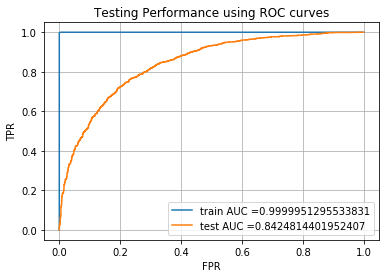

In [47]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=10,
               min_child_weight=1, monotone_constraints='()',
               n_estimators=250, n_jobs=12, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=None)
xgb.fit(np.array(X_train), y_train)

y_train_pred = batch_predict(xgb, np.array(X_train))    
y_test_pred = batch_predict(xgb, np.array(X_test))

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Testing Performance using ROC curves")
plt.grid()
plt.show()

In [48]:
print(tabulate([ 
                ['OneHot','Naive Bayes',10,0.69,0.71], ['OneHot','Logistic Regression',0.05,0.71,0.74],
 ['OneHot','SVM Linear',0.005,0.71,0.73],['OneHot','Decison Trees','d=50,min-sample:100',0.75,0.84],
    ['OneHot','Random Forest Model','max_depth=6, max_features=0.5, n_estimators=500',0.76,0.81],
['OneHot','Xgboost','depth=10,n_estimators:250',0.83,0.99]],
               headers=['Vectorizer', 'Model', 'HyperParameter', "Test AUC","Train AUC"],
               tablefmt='orgtbl'))

| Vectorizer   | Model               | HyperParameter                                  |   Test AUC |   Train AUC |
|--------------+---------------------+-------------------------------------------------+------------+-------------|
| OneHot       | Naive Bayes         | 10                                              |       0.69 |        0.71 |
| OneHot       | Logistic Regression | 0.05                                            |       0.71 |        0.74 |
| OneHot       | SVM Linear          | 0.005                                           |       0.71 |        0.73 |
| OneHot       | Decison Trees       | d=50,min-sample:100                             |       0.75 |        0.84 |
| OneHot       | Random Forest Model | max_depth=6, max_features=0.5, n_estimators=500 |       0.76 |        0.81 |
| OneHot       | Xgboost             | depth=10,n_estimators:250                       |       0.83 |        0.99 |


##  Feature Importance

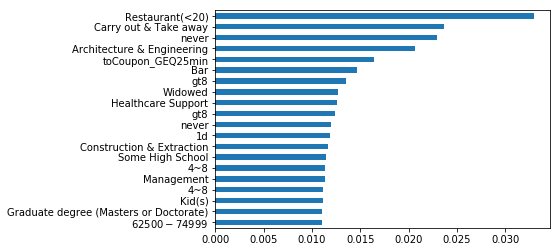

In [55]:
feat_imp = pd.Series(xgb.feature_importances_, index=X.columns)
feat_imp.nlargest(20)[::-1].plot(kind='barh')

## Conclusion

* Since Gradient Boost has best Train and Test AUC score, We believe this is the most suitable model to predict whether a person is likely to buy a coupon or not.
* A restaurant coupon worth $20 or less followed by a carry out and Take away coupon and bar coupon play an important role in decision making. As supported by EDA it is more likely that restaurant coupons worth less than 20 are accepted<br/>
* Occupational background such as Architecture and Engineering play an important role in decision making <br/>


